# Cubical complexes

Using cubical complexes to represent sublevel sets

In [1]:
using KernelDensity
using ComputationalHomology
using DelimitedFiles
using Plots
using TDA
default(fmt = :png)

TDA signatures can be extracted from the upper level or sublevel sets of a function $f :\mathbb R^p \mapsto \mathbb R$.

One possible approach for studying the topology of the sublevel sets of $f$ is to define a regular grid on $R^d$ and then a filtered complex with vertices located on this grid, with $f$ as filtration function. Such a grid-based filtered complex is called a cubical complexes.

## Loading data

We use the `crater` dataset to illustrate cubical complex filtrations

In [2]:
X = readdlm("crater.csv", ',', Float32);
X[1:10,:]

10×2 Matrix{Float32}:
 0.392345  1.24778
 5.40588   2.40142
 0.215228  1.26093
 2.55846   7.2899
 7.68145   5.20131
 7.9544    5.56682
 1.04503   0.972434
 6.75117   2.93281
 2.25166   6.78419
 6.19925   3.40838

The point cloud is in $\mathbb R^2$ and is composed of a central annulus and four clusters at the corners:

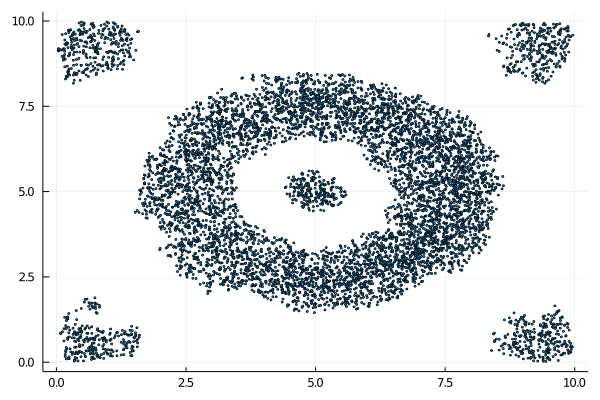

In [3]:
scatter(X[:,1],X[:,2], ms=2, leg=:none)

Instead of directly defining a Vietoris-Rips complex on the point cloud, we want to study the upper level sets of a density estimator computed on the point cloud.

We fit a $2$-dimensional standard kernel density estimator on the data using `KernelDensity` package

In [4]:
U = kde(X, bandwidth=(0.3f0,0.3f0))

BivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(-1.1628822460770607:0.04833267684660706:11.16195034980774, -1.1777377482503653:0.0484242263012657:11.170439958572388, [6.126557902618869e-12 1.0750135549622713e-11 … 5.599192987776343e-12 4.626493994007768e-12; 9.673222502409435e-12 1.811001067712415e-11 … 5.351117027297973e-12 5.9504025503145524e-12; … ; 8.906996738463653e-12 1.2723714473352342e-11 … 1.6795793057364437e-11 1.0105770201071947e-11; 5.941113106669797e-12 9.264993813018617e-12 … 8.920624650082954e-12 5.846672116968382e-12])

We define a regular grid on $[-1,11] \times [-1,11]$.

In [5]:
xs = range(-1f0,11f0, step=0.05)
ys = range(-1f0,11f0, step=0.05)

-1.0:0.05:11.0

The cubical complex filtration considers the sublevel sets of the filtration function. For studying the upper level sets of the density we need to take the opposite of the KDE. We define the filtration value at each vertex as follows

In [6]:
filt_values = -pdf(U,xs,ys)

241×241 Matrix{Float64}:
 -4.72167e-10  -8.69013e-10  -1.55833e-9  …  -9.93248e-11  -5.14265e-11
 -9.22679e-10  -1.69676e-9   -3.04012e-9     -1.95515e-10  -1.01553e-10
 -1.75937e-9   -3.2331e-9    -5.7887e-9      -3.83e-10     -1.99604e-10
 -3.27014e-9   -6.00515e-9   -1.07446e-8     -7.36311e-10  -3.85052e-10
 -5.92394e-9   -1.08708e-8   -1.9437e-8      -1.38521e-9   -7.2691e-10
 -1.04604e-8   -1.91818e-8   -3.42732e-8  …  -2.54918e-9   -1.34241e-9
 -1.8006e-8    -3.29947e-8   -5.89118e-8     -4.58898e-9   -2.42506e-9
 -3.02162e-8   -5.53283e-8   -9.8718e-8      -8.08104e-9   -4.28534e-9
 -4.94362e-8   -9.04549e-8   -1.61276e-7     -1.39208e-8   -7.40748e-9
 -7.88631e-8   -1.44191e-7   -2.56901e-7     -2.34588e-8   -1.25248e-8
 -1.22679e-7   -2.24137e-7   -3.99055e-7  …  -3.86713e-8   -2.0714e-8
 -1.86118e-7   -3.39791e-7   -6.04538e-7     -6.23591e-8   -3.35066e-8
 -2.75414e-7   -5.02449e-7   -8.93311e-7     -9.83593e-8   -5.30074e-8
  ⋮                                       ⋱      

We can visualize the estimated density with a standard 2d-kernel estimator

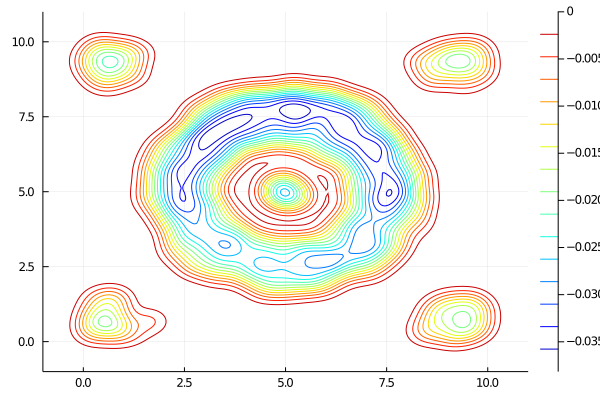

In [7]:
contour(xs, ys, filt_values, c = :jet1)

We are now all set to compute the cubical complex filtration based from the filtration values stored in `filt_values`

In [8]:
cplx = BitmapComplex(filt_values)

BitmapComplex((58564, 116644, 58081))

In [9]:
dim(cplx) # complex dimension

2

In [10]:
length(cplx) # number of cubes

233289

Now, we compute a persistence diagram from the complex

In [11]:
pd = cplx |> filtration |> diagram

Dict{Int64, Vector{Interval{Float64}}} with 2 entries:
  0 => [[-0.03741849607390338,-0.03443038299340862), [-0.03467181247987771,-0.0…
  1 => [[-0.0031438032359942577,-0.003127224283466167), [-0.00310787361355426,-…

We can plot our persistence diagram as a collection of `(birth, death)` points of the topological features. It shows five $0$-dimensional features as the blue points (holes of dimension $0$, namely connected components), and one $1$-dimensional feature as a red point. The last connected component dies at infinity in the filtration (blue square point at the top-left conner).

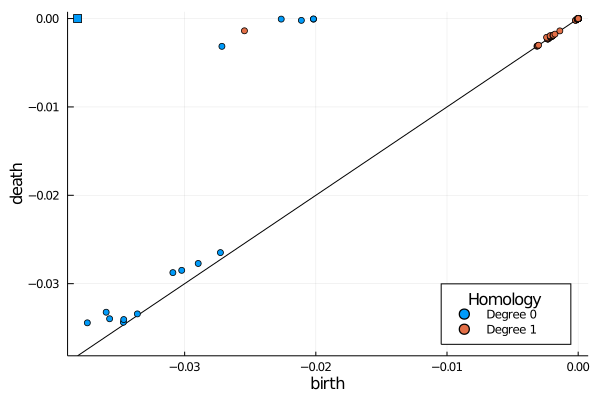

In [14]:
plot(pd, ms=4)

Or, we can plot "barcode" plot for this diagram. The last connected component dies at infinity in the filtration (showed as arrow on the top plot).

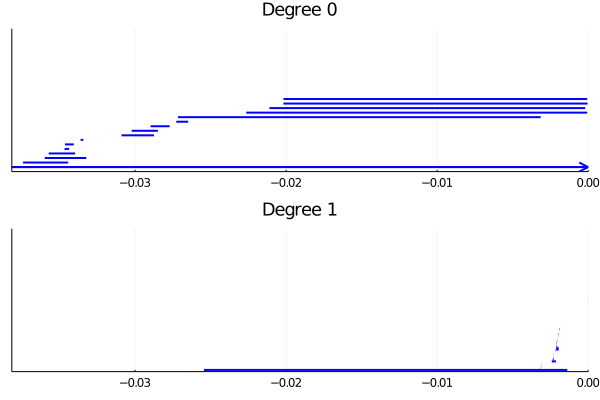

In [13]:
plot(pd, seriestype=:barcode)